<a href="https://colab.research.google.com/github/oreomcflurryyy/data-analysis/blob/main/linear_regression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression
!unzip "salary-dataset-simple-linear-regression"

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 1.01MB/s]
Archive:  salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Reading the dataset from a CSV file named Salary_dataset.csv using Pandas.

In [3]:
data = pd.read_csv('Salary_dataset.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
X = data['YearsExperience']
Y = data['Salary']
Y /= 1000

padding = 0.1  # 10% padding
x_max = max(X) * (1 + padding)
y_max = max(Y) * (1 + padding)
x_min = min(X) * (1 - padding)
y_min = min(Y) * (1 - padding)

# Ensure minimum values don't go below 0 if data is all positive
x_min = max(0, x_min)
y_min = max(0, y_min)

Creating a scatter plot to visualize the relationship between Years of Experience and Salary (in thousands).

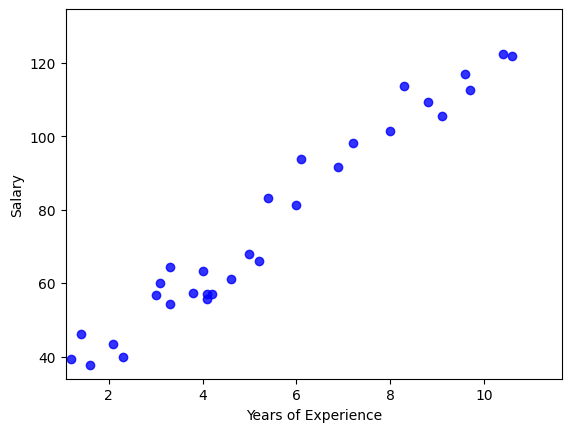

In [6]:
plt.scatter(x=X, y=Y, c='blue', alpha=0.8, marker='o')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.show()

In [7]:
m = X.shape[0]

In [8]:
# Define the range for w and b
w_range = np.linspace(-1e2, 1e2, 200)
b_range = np.linspace(-1e2, 1e2, 200)
W, B = np.meshgrid(w_range, b_range)

# Calculate the cost function for each combination of w and b
J_values = np.zeros((w_range.shape[0], b_range.shape[0]))
for i in range(len(w_range)):
    for j in range(len(b_range)):
        w = w_range[i]
        b = b_range[j]
        Yhat = w * X + b
        J_values[i, j] = 1 / (2 * m) * np.sum((Yhat - Y) ** 2)

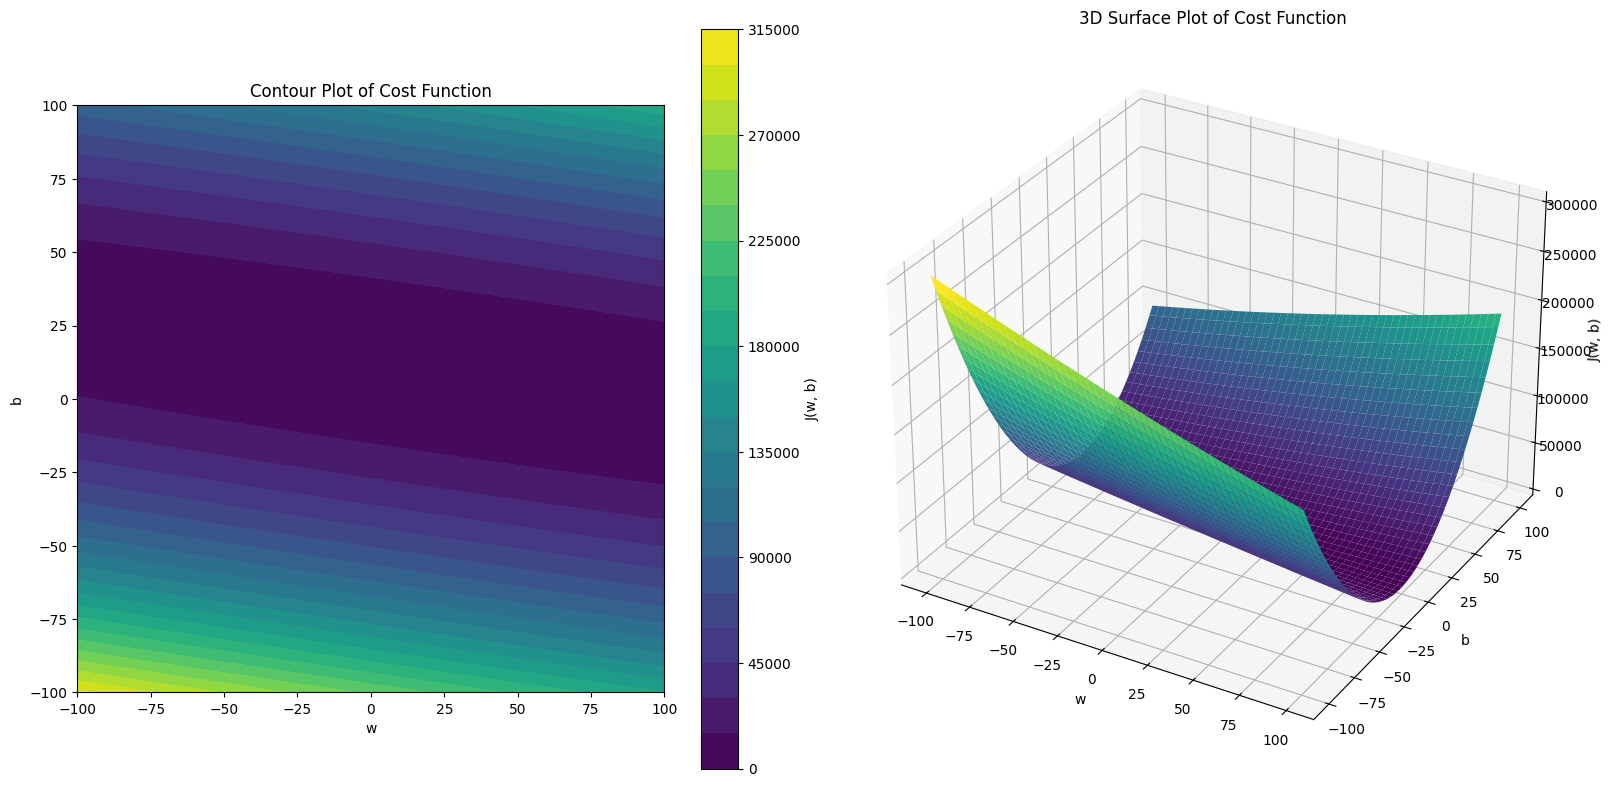

In [9]:
# Create a figure with subplots
fig = plt.figure(figsize=(16, 8))

# Contour Plot
ax1 = fig.add_subplot(121)  # 1 row, 2 columns, 1st subplot
contour = ax1.contourf(W, B, J_values, levels=20, cmap='viridis')
ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_title('Contour Plot of Cost Function')
plt.colorbar(contour, ax=ax1, label='J(w, b)')
ax1.set_aspect('equal', adjustable='box')

# 3D Surface Plot
ax2 = fig.add_subplot(122, projection='3d')  # 1 row, 2 columns, 2nd subplot
ax2.plot_surface(W, B, J_values, cmap='viridis', edgecolor='none')
ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.set_zlabel('J(w, b)')
ax2.set_title('3D Surface Plot of Cost Function')

plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

In [10]:
def plot_regression_line(w, b):
    Xhat = np.linspace(-100, 100, 100)
    Yhat = w * Xhat + b
    j = 1 / (2 * m) * np.sum((w * X + b - Y) ** 2)
    print(f"The value of J for w = {w:.2f} and b = {b:.2f} is: {j:.2f}")

    # Plot the line on the scatter plot
    plt.scatter(x=X, y=Y, c='blue', alpha=0.8, marker='o')
    # Plot the reggression line
    plt.plot(Xhat, Yhat, color='red', label=f'y = {w:.2f}x + {b:.2f}')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.legend()
    plt.show()

We prompt the user to enter values for the weight (`w`) and bias (`b`). These values are then passed to the function `plot_regression_line(w, b)`, which will plot the regression line based on the provided parameters.

Enter the value of w: 10
Enter the value of b: 25
The value of J for w = 10.00 and b = 25.00 is: 21.71


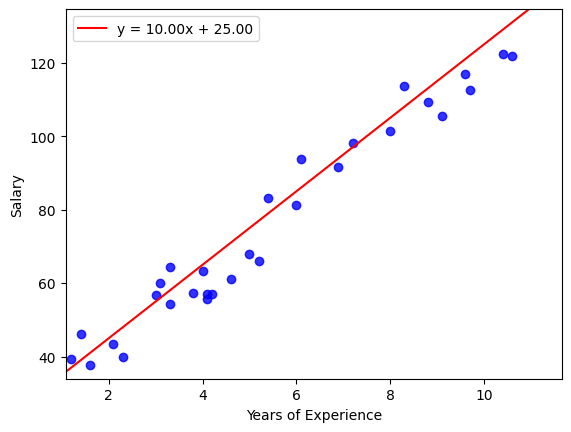

In [11]:
w = float(input("Enter the value of w: "))
b = float(input("Enter the value of b: "))
plot_regression_line(w, b)

In [12]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost_function, gradient_function):
    w = w_init
    b = b_init
    J_hist = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = cost_function(x, y, w, b)

        if i % 100 == 0:
            print(f"Iteration {i:4}: Cost {J:0.2e} ",
          f"w: {w: 0.3e}, b: {b: 0.3e}")

        J_hist.append(J)
        if i > 0 and J_hist[i-1] - J_hist[i] <= 1e-5:
            break

    w_final = w
    b_final = b
    return w_final, b_final, J_hist

In [13]:
def gradient_function(x, y, w, b):
    m = x.shape[0]
    Yhat = w * x + b
    dj_dw = (1 / m) * np.sum((Yhat - y) * x)
    dj_db = (1 / m) * np.sum(Yhat - y)

    return dj_dw, dj_db

In [14]:
def cost_function(x, y , w, b):
    Yhat = w * x + b
    return 1 / (2 * m) * np.sum((Yhat - y) ** 2)

Start by initializing the weight (`w`) and bias (`b`) parameters to 0. We then set the number of iterations and the learning rate for our gradient descent algorithm. Using these parameters along with our custom `cost_function` and `gradient_function`, the `gradient_descent` function minimizes the cost function. It returns the final values of `w` and `b`, along with the history of the cost function values over the iterations. Finally, we plot the cost history to observe how the cost decreases over time.

Iteration    0: Cost 2.61e+03  w:  2.425e+01, b:  3.800e+00
Iteration  100: Cost 2.25e+01  w:  1.064e+01, b:  1.676e+01
Iteration  200: Cost 1.65e+01  w:  9.873e+00, b:  2.197e+01
Iteration  300: Cost 1.57e+01  w:  9.600e+00, b:  2.382e+01
Iteration  400: Cost 1.56e+01  w:  9.504e+00, b:  2.448e+01
Iteration  500: Cost 1.56e+01  w:  9.469e+00, b:  2.472e+01


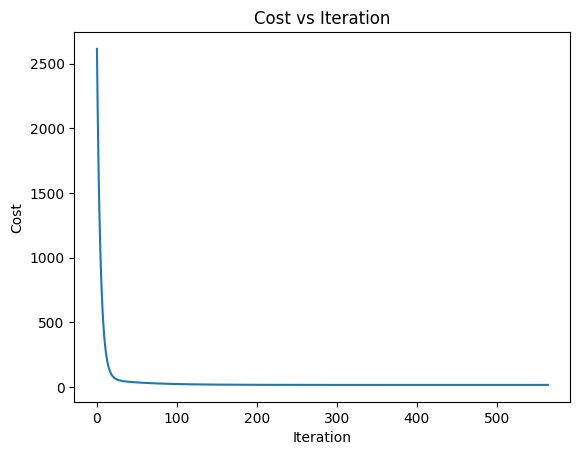

In [15]:
w_init = 0
b_init = 0
num_iters = 1000
alpha = 0.05
w_final, b_final, J_hist = gradient_descent(X, Y, w_init, b_init, alpha, num_iters, cost_function, gradient_function)
plt.plot(J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

After performing gradient descent and obtaining the optimal values for weight (`w_final`) and bias (`b_final`), we let us visualise the final regression line.

The value of J for w = 9.46 and b = 24.78 is: 15.64


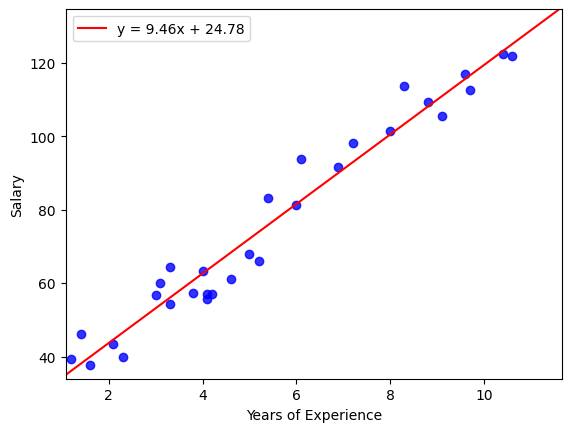

In [16]:
plot_regression_line(w_final, b_final)